## AI-Driven Optimal Placement of Electric Vehicles Charging Stations in Kenya

### Business Understanding 

#### Backgound Information & Overview

Kenya is undergoing a transportation and energy transformation, with electric vehicle (EV) adoption increasing due to rising fuel costs, government incentives, and a global push for sustainability efforts. However, the absence of a data-driven approach to charging station placement is slowing down EV adoption. Currently, charging station deployment is largely arbitrary, reactive, or limited to a few locations, leading to underutilization, range anxiety, and inefficient infrastructure investment.

#### Problem Statement

The adoption of electric vehicles (EVs) in Kenya is increasing, but the absence of a well-planned, optimized EV charging infrastructure remains a major barrier to widespread adoption. Current charging stations are placed without data-driven insights, leading to low utilization rates, inconvenient locations, and poor return on investment for operators.

* current number EV charging stations
* 

#### Proposed Solution

By integrating machine learning, geospatial analytics, and optimization models, this AI-driven platform will revolutionize EV infrastructure planning in Kenya. The solution ensures that charging stations are placed where they are most needed, cost-effective, and energy-efficient, paving the way for a sustainable and profitable EV ecosystem.

* Using K-Means Clustering, DBSCAN, and Hierarchical Clustering to help map out the best possible station locations based on geography and infrastructure constraints.
* Use Graph-based Routing and Dijkstra’s Algorithm to ensure stations are placed within an optimal travel distance for EV users. For example ensuring no driver needs to travel more than 5 km to find a charging station.
* Use Random Forest Regression, XGBoost, and Gradient Boosting Machines (GBM) to identify the key drivers of charging station demand based on traffic volume, population density, nearby commercial hubs, weather conditions and charging station accessibility.

#### Objectives

This project seeks to solve this by developing an AI-powered platform that leverages machine learning, geospatial data, and predictive analytics to identify optimal locations for EV charging stations.

The platform will enable:

* EV charging network planners to maximize utilization and profitability by selecting high-demand locations.
* Government agencies to accelerate green mobility initiatives through data-backed decision-making.
* Investors to make informed funding decisions, ensuring high ROI.
* EV users to access conveniently located charging stations, improving the overall user experience.

#### Metrics of Success

1. The model should correctly predict at least 90% of high-demand locations, minimizing false positives and negatives when identifying optimal sites. 
2. The model should achieve an R² score of at least 0.85, ensuring strong correlation between predicted and actual charging demand.
3. At least 80% of the suggested locations should be within 500 meters of a power grid connection, ensuring practical deployment feasibility.
4. The model should maintain an accuracy above 85% when tested on new urban areas, ensuring adaptability as Nairobi’s EV market grows.





### Data Understanding

The data is sourced from the U.S. Department of Transportation, Bureau of Transportation Statistics, about Electric Vehicle Public Charging Stations in the United States as of January 2020. Link - https://data-usdot.opendata.arcgis.com/datasets/alternative-fueling-stations/explore

### Importin the Relevant Libraries

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import Functions as Mf
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [123]:
import pandas as pd

#Alternative_Fueling_Stations.csv

# Load the first sheet into a DataFrame
df = pd.read_csv('Alternative_Fueling_Stations.csv')

# Display the first few rows to understand the structure
df.head()


C:\Users\Damaris\AppData\Local\Temp\ipykernel_14600\199429728.py:6: DtypeWarning: Columns (0,13,15,29,32,34,35,38,43,47,52,53,54,56,57,60,61,62,63,64,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alternative_Fueling_Stations.csv')


,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
0,1,private,NaN,NaN,NaN,10/11/2024 12:00:00 AM,NaN,CNG,Private,17.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,2,private,NaN,GOVERNMENT,NaN,2/12/2024 12:00:00 AM,NaN,CNG,Private - Government only,45.0,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,3,private,NaN,NaN,NaN,12/13/2023 12:00:00 AM,NaN,CNG,Private,64.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,4,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,4/14/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,73.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,12/10/2024 12:00:00 AM,NaN,CNG,Public - Credit card at all times,81.0,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [124]:
df.shape

(97882, 80)

The dataset contains information about alternative fueling stations, including EV charging stations. Key columns relevant for EV Charging Station Placement Analysis include:

* access_code – Whether the station is public or private.
* access_days_time – Availability (e.g., 24-hour access).
* fuel_type_code – Identifies the fuel type (e.g., EV for Electric Vehicles).
* groups_with_access_code – Specifies access permissions.
* ev_pricing_fr – Pricing model for EV charging.
* ev_network_ids_station – Identifies the charging network.
* x, y – Longitude and Latitude coordinates of the station (for mapping).
* federal_agency_name – Indicates government or private ownership.

In [125]:
df['fuel_type_code'].value_counts()

fuel_type_code
ELEC    85398
E85      4719
LPG      2865
BD       1793
RD       1519
CNG      1372
LNG       112
HY        103
Name: count, dtype: int64

* From the above value_counts of the fuel_type_code, we are interested in the electrical vehicles. We proceed to filtering the dataframe for the 'ELEC' fuel_type_code.
* Some of the features are irrelevant to our analysis; First, determine the features of interest in the analysis and filter the dataframe accordingly.

In [126]:
df_elec = df[df['fuel_type_code'] == 'ELEC']
df_elec.head()

,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,x,y
125,126,private,Fleet use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1517.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
126,127,public,5:30am-9pm; pay lot,NaN,NaN,1/10/2023 12:00:00 AM,NaN,ELEC,Public,1523.0,...,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
127,128,private,For fleet and employee use only,NaN,NaN,9/14/2023 12:00:00 AM,NaN,ELEC,Private,1525.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
128,129,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1531.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
129,130,private,Fleet use only,NaN,NaN,1/9/2024 12:00:00 AM,NaN,ELEC,Private,1552.0,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-118.265628,33.770508


In [127]:
# Display the columns
print(df_elec.columns)

Index(['OBJECTID', 'access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id',
       'maximum_vehicle_class', 'open_date', 'owner_type_code',
       'restricted_access', 'status_code', 'funding_sources', 'facility_type',
       'station_name', 'station_phone', 'updated_at', 'geocode_status',
       'latitude', 'longitude', 'city', 'country', 'intersection_directions',
       'plus4', 'state', 'street_address', 'zip', 'bd_blends',
       'cng_dispenser_num', 'cng_fill_type_code', 'cng_has_rng', 'cng_psi',
       'cng_renewable_source', 'cng_total_compression', 'cng_total_storage',
       'cng_vehicle_class', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'ev_workplace_charging',


In [128]:
relevant_columns = [
    'station_name', 'latitude', 'longitude', 'city', 'state',"restricted_access","ev_renewable_source",
    'street_address', 'status_code', 'access_code',"cards_accepted","ev_workplace_charging",
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num', "intersection_directions","owner_type_code",
    'ev_level2_evse_num', 'ev_network', 'ev_pricing',"access_days_time","maximum_vehicle_class","facility_type"
]

Ev_df = df_elec[relevant_columns]
Ev_df.head()

,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,street_address,status_code,access_code,...,ev_dc_fast_num,ev_level1_evse_num,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,ev_pricing,access_days_time,maximum_vehicle_class,facility_type
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,NaN,NaN,11797 Truesdale St,E,private,...,2.0,NaN,NaN,LG,57.0,SHELL_RECHARGE,NaN,Fleet use only,NaN,UTILITY
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0.0,NaN,1201 S Figueroa St,E,public,...,NaN,NaN,West hall and South hall,P,7.0,Non-Networked,Free; parking fee,5:30am-9pm; pay lot,LD,PARKING_GARAGE
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,111 N Hope St,E,private,...,12.0,NaN,Across Hope,LG,338.0,Non-Networked,NaN,For fleet and employee use only,LD,UTILITY
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,NaN,NaN,6801 E 2nd St,E,private,...,1.0,NaN,NaN,LG,19.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,NaN,NaN,161 N Island Ave,E,private,...,NaN,NaN,At B St,LG,10.0,Non-Networked,NaN,Fleet use only,NaN,UTILITY


In [129]:
Mf.check_info(Ev_df)

=============== Dataset Shape =================
(85398, 23)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'restricted_access', 'ev_renewable_source', 'street_address',
       'status_code', 'access_code', 'cards_accepted', 'ev_workplace_charging',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'intersection_directions', 'owner_type_code', 'ev_level2_evse_num',
       'ev_network', 'ev_pricing', 'access_days_time', 'maximum_vehicle_class',
       'facility_type'],
      dtype='object')

=============== Data Types =================
station_name                object
latitude                   float64
longitude                  float64
city                        object
state                       object
restricted_access           object
ev_renewable_source         object
street_address              object
status_code                 object
access_code                 object
cards_ac

The dataset comprise of 9093 rows and 3 columns; the **tweet_text**,**emotion_in_tweet_is_directed_at** and **is_there_an_emotion_directed_at_a_brand_or_product**. 
* The tweet_text column contain the tweet or the text written on the twitter platform. The emotiom_in_tweet_is_directed_at column shows items produced as products or evene services by Apple and Google, that the tweets were directed at. The last column shows whether the tweet written had a positive, negative or neutral impact. 
* All

#### Data Cleaning
Check for missing value and duplicates

In [130]:
missing_percentage_df = (Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False).reset_index()
missing_percentage_df.columns = ['**Column Name**', '**Missing Percentage**']

missing_percentage_df.style.set_properties(**{'text-align': 'left'})

,**Column Name**,**Missing Percentage**
0,ev_renewable_source,99.532776
1,ev_level1_evse_num,99.241200
2,cards_accepted,90.977540
3,restricted_access,85.356800
4,maximum_vehicle_class,85.208084
5,ev_dc_fast_num,84.649523
6,ev_pricing,81.877796
7,facility_type,77.417504
8,owner_type_code,75.698494
9,intersection_directions,71.321342


We established a 20% threshold for missing values to ensure data quality while retaining critical information. This decision was driven by the fact that the ev_level2_evse_num column, which has approximately 18% missing values, is essential for our analysis. Level 2 EV chargers play a pivotal role in the charging infrastructure, influencing station accessibility and user convenience. By setting this threshold, we strike a balance between maintaining robust dataset integrity and preserving key variables necessary for meaningful insights.

In [131]:
# Dropping columns with above 20% missing values
def drop_high_null_columns(df, threshold=20):
    return df.loc[:, (df.isna().sum() / len(df) * 100) <= threshold]

df_20_percent=drop_high_null_columns(Ev_df, threshold=20)
df_20_percent
    

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97877,SHOP CHARGING S SHOP 2,33.021393,-96.987131,Lewisville,TX,1547 S Stemmons Fwy,E,public,0.0,"[""""J1772""""]",1.0,ChargePoint Network,24 hours daily
97878,Bay Point Rentals,25.598390,-80.357119,Miami,FL,18412 Homestead Ave,E,public,0.0,"[""""J1772""""]",7.0,CHARGELAB,NaN
97879,"Out of Service - Energy Conservation & Supply,...",40.674470,-73.995734,Brooklyn,NY,53 9th St,E,public,0.0,"[""""J1772""""]",10.0,CHARGELAB,NaN
97880,Out of Service - Dignity Moves,37.783456,-122.281623,Alameda,CA,2350 5th St,E,public,0.0,"[""""J1772""""]",2.0,CHARGELAB,NaN


In [132]:
Ev_df1 = df_20_percent.copy()

In [133]:
# Checking for duplicates 
print(f"We have {Ev_df1.duplicated().sum()} in our data set")

We have 3725 in our data set


In [134]:
# Handling the duplicates 
Ev_df_noduplicate = Ev_df1.drop_duplicates()
# Confirming that the duplicates have been handled
print(f"Our dataframe now has {Ev_df_noduplicate.duplicated().sum()} duplicates")

Our dataframe now has 0 duplicates


In [135]:
Mf.check_info(Ev_df_noduplicate)

=============== Dataset Shape =================
(81673, 13)

=============== Dataset Columns =================
Index(['station_name', 'latitude', 'longitude', 'city', 'state',
       'street_address', 'status_code', 'access_code', 'ev_workplace_charging',
       'ev_connector_types', 'ev_level2_evse_num', 'ev_network',
       'access_days_time'],
      dtype='object')

=============== Data Types =================
station_name              object
latitude                 float64
longitude                float64
city                      object
state                     object
street_address            object
status_code               object
access_code               object
ev_workplace_charging    float64
ev_connector_types        object
ev_level2_evse_num       float64
ev_network                object
access_days_time          object
dtype: object

=============== Dataset Information =================
<class 'pandas.core.frame.DataFrame'>
Index: 81673 entries, 125 to 97881
Data columns

In [136]:
# Making copy of the dataframe
Ev_df2 = Ev_df_noduplicate.copy()


In [137]:
# Viewing the numerical columns
Numericals = Ev_df2.select_dtypes(include='number')
Numericals.head(3)

,latitude,longitude,ev_workplace_charging,ev_level2_evse_num
125,34.248319,-118.387971,1.0,57.0
126,34.040539,-118.271387,0.0,7.0
127,34.059133,-118.248589,1.0,338.0


In [138]:
# Viewing the Categorical Columns
categoricals = Ev_df2.select_dtypes(include='object')
categoricals.head(3)

,station_name,city,state,street_address,status_code,access_code,ev_connector_types,ev_network,access_days_time
125,LADWP - Truesdale Center,Sun Valley,CA,11797 Truesdale St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",SHELL_RECHARGE,Fleet use only
126,Los Angeles Convention Center,Los Angeles,CA,1201 S Figueroa St,E,public,"[""""J1772""""]",Non-Networked,5:30am-9pm; pay lot
127,LADWP - John Ferraro Building,Los Angeles,CA,111 N Hope St,E,private,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Non-Networked,For fleet and employee use only


## Exploratory Data Analysis(EDA)
### Univariate Analysis

##### Numericals 

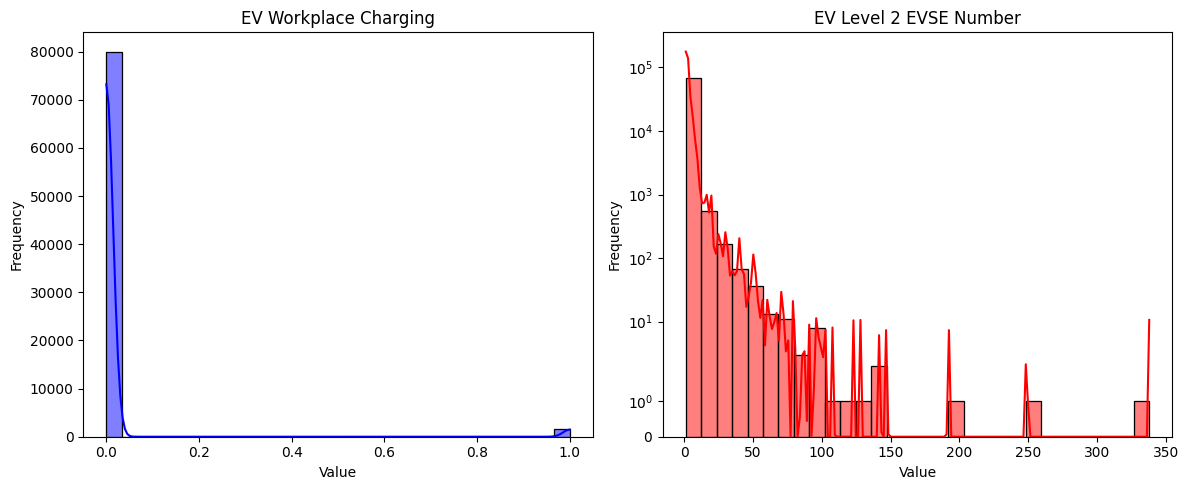

In [139]:
# Checking on the distribution  of the 2 numerical columns 
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 r

# Plot the first histogram
sns.histplot(Numericals["ev_workplace_charging"], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("EV Workplace Charging")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
plt.yscale("symlog")

# Plot the second histogram
sns.histplot(Numericals["ev_level2_evse_num"], bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title("EV Level 2 EVSE Number")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
plt.yscale("symlog")

plt.tight_layout()
plt.show()

##### Imputing ev_level2_evse_num with zeroes
- In this context, missing values are not due to data collection errors but rather signify that no Level 2 chargers exist at the station. Imputing with a mean or median would artificially inflate infrastructure data, leading to misleading insights. Assigning zero ensures data integrity by accurately reflecting station capabilities without introducing false assumptions.
##### Imputing ev_workplace_charging column with median
- Since the data is right-skewed, using the median is the best choice. Unlike the mean, which can be pulled up by a few stations with a high number of chargers, the median gives a more balanced and realistic estimate. This approach prevents overestimation, keeps the data representative, and maintains the true distribution of workplace chargers.

#### Categoricals

In [140]:
categoricals['street_address'].value_counts()

street_address
2910 Tannery Way                         87
806 S Airport Blvd Long Term Garage 2    57
10710 N Tantau Ave                       47
3162 Olin Ave                            45
24255 Pacific Coast Hwy                  41
                                         ..
501 W Edgerton Ave                        1
2737 NY-52                                1
172-180 North Genesee Street              1
3520 Louis Stephens Drive                 1
137 East 7th Street                       1
Name: count, Length: 55896, dtype: int64

In [141]:
# cLeaning and encoding the station_name columns
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if isinstance(station_name, str):  
        parts = station_name.strip().split(' - ', 1)
        return parts if len(parts) == 2 else (station_name, station_name)
    return None, None  # Handles NaN or non-string values

# Apply the function to split the column efficiently
Ev_df2[['station_region', 'station_subregion']] = (
    Ev_df2['station_name']
    .astype(str)  # Convert everything to string to avoid errors
    .str.strip()
    .str.split(' - ', n=1, expand=True)
    .fillna(method='ffill', axis=1)  # Fill second column with first if there's no hyphen
)
Ev_df2[['station_region', 'station_subregion']]
Ev_df2['station_region_encoded'] = Ev_df2['station_region'].factorize()[0]
Ev_df2['station_subregion_encoded'] = Ev_df2['station_subregion'].factorize()[0]
Ev_df2.head(5)


C:\Users\Damaris\AppData\Local\Temp\ipykernel_14600\2664357768.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill', axis=1)  # Fill second column with first if there's no hyphen


,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only,LADWP,Truesdale Center,0,0
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,0,2
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only,LADWP,Haynes Power Plant,0,3
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only,LADWP,Harbor Generating Station,0,4


In [142]:
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only,LADWP,Truesdale Center,0,0
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,0,2
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only,LADWP,Haynes Power Plant,0,3
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only,LADWP,Harbor Generating Station,0,4


In [143]:
import pandas as pd
import re
from datetime import datetime, timedelta
from typing import List, Tuple, Optional

def calculate_hours(start_time: str, end_time: str) -> float:
    """
    Calculate the number of hours between start and end time.
    """
    start = datetime.strptime(start_time, "%H:%M")
    end = datetime.strptime(end_time, "%H:%M")
   
    if end < start:
        end = end + timedelta(days=1)
   
    diff = end - start
    hours = diff.total_seconds() / 3600
   
    return round(hours, 2)

def extract_time_and_hours(text: str) -> dict:
    """
    Extract time information and calculate hours from parking lot access descriptions.
    """
    # Handle non-string input
    if pd.isna(text) or not isinstance(text, str):
        return {
            'times': None,
            'hours': None
        }
   
    # Check for 24 hours daily first
    if '24 hours' in text.lower():
        return {
            'times': [('all', '00:00', '23:59')],
            'hours': 24.0
        }
   
    # Pattern for day-specific times
    day_specific_pattern = r'(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\s+(\d{1,2}:?\d{0,2}(?:am|pm))\s*-\s*(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    # Pattern for general time range
    general_time_pattern = r'(\d{1,2}:?\d{0,2}(?:am|pm))-(\d{1,2}:?\d{0,2}(?:am|pm))'
   
    def standardize_time(time_str: str) -> str:
        """Convert time strings to 24-hour format."""
        time_str = time_str.strip().lower()
       
        if ':' not in time_str:
            time_str = time_str.replace('am', ':00am').replace('pm', ':00pm')
       
        hour = int(time_str.split(':')[0])
        minutes = int(time_str.split(':')[1][:2])
        is_pm = 'pm' in time_str
       
        if is_pm and hour != 12:
            hour += 12
        elif not is_pm and hour == 12:
            hour = 0
           
        return f"{hour:02d}:{minutes:02d}"
   
    # Try to find day-specific times first
    day_matches = re.findall(day_specific_pattern, text)
    if day_matches:
        # Take only the first day's times since they're all the same
        day, start, end = day_matches[0]
        start_time = standardize_time(start)
        end_time = standardize_time(end)
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [(day, start_time, end_time)],
            'hours': hours
        }
   
    # If no day-specific times found, look for general time range
    general_matches = re.findall(general_time_pattern, text)
    if general_matches:
        start_time = standardize_time(general_matches[0][0])
        end_time = standardize_time(general_matches[0][1])
        hours = calculate_hours(start_time, end_time)
        return {
            'times': [('all', start_time, end_time)],
            'hours': hours
        }
   
    return {
        'times': None,
        'hours': None
    }

def process_dataframe(df, column_name='access_days_time'):
    """
    Process the dataframe and add hours column.
   
    Args:
        df: pandas DataFrame
        column_name: name of the column containing time information
   
    Returns:
        pandas DataFrame with new 'access_hours' column
    """
 
    # Apply the extraction function to each row
    results = df[column_name].apply(extract_time_and_hours)
   
    # Add the hours as a new column
    df['access_hours'] = results.apply(lambda x: x['hours'])
   
    return df

Ev_df2 = process_dataframe(Ev_df2)
Ev_df2[:5]

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only,LADWP,Truesdale Center,0,0,NaN
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1,15.5
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,0,2,NaN
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only,LADWP,Haynes Power Plant,0,3,NaN
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only,LADWP,Harbor Generating Station,0,4,NaN


Frequency encoding helps optimize EV station placement by turning city names into numbers based on how often they appear in the dataset. This allows machine learning models to identify high-demand areas—like big cities needing more charging stations—without adding unnecessary complexity

In [144]:
# Cleaning the 'state' and 'city' columns
def clean_and_encode_ev_data(df):
    # Drop missing values in 'state' and 'city' columns early
    df = df.dropna(subset=["state", "city"]).copy()

    # Standardizing states and cities
    df["state"] = df["state"].str.upper().str.strip().replace({
        "CALIFORNIA": "CA",
        "NEW YORK STATE": "NY",
        "FLORIDA": "FL",
    })

    df["city"] = df["city"].str.lower().str.strip().replace({
        "nyc": "new york",
        "sf": "san francisco",
        "san fran": "san francisco",
        "la": "los angeles",
    })

    # Apply frequency encoding
    df["state_freq_encoded"] = df["state"].map(df["state"].value_counts())
    df["city_freq_encoded"] = df["city"].map(df["city"].value_counts())

    return df
Ev_df2 = clean_and_encode_ev_data(Ev_df2)    
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,ev_level2_evse_num,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded
125,LADWP - Truesdale Center,34.248319,-118.387971,sun valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",57.0,SHELL_RECHARGE,Fleet use only,LADWP,Truesdale Center,0,0,NaN,19896,9
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",7.0,Non-Networked,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1,15.5,19896,1943
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",338.0,Non-Networked,For fleet and employee use only,LADWP,John Ferraro Building,0,2,NaN,19896,1943
128,LADWP - Haynes Power Plant,33.759802,-118.096665,long beach,CA,6801 E 2nd St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",19.0,Non-Networked,Fleet use only,LADWP,Haynes Power Plant,0,3,NaN,19896,229
129,LADWP - Harbor Generating Station,33.770508,-118.265628,wilmington,CA,161 N Island Ave,E,private,1.0,"[""""J1772""""]",10.0,Non-Networked,Fleet use only,LADWP,Harbor Generating Station,0,4,NaN,19896,163


In [145]:
categoricals.columns

Index(['station_name', 'city', 'state', 'street_address', 'status_code',
       'access_code', 'ev_connector_types', 'ev_network', 'access_days_time'],
      dtype='object')

In [146]:
categoricals["access_code"].value_counts()

access_code
public     77015
private     4658
Name: count, dtype: int64

In [147]:
Ev_df2["access_code_cleaned"] = Ev_df2["access_code"].astype(str).str.lower().str.strip().map({"private": 0, "public": 1})
Ev_df2.tail()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,...,ev_network,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned
97877,SHOP CHARGING S SHOP 2,33.021393,-96.987131,lewisville,TX,1547 S Stemmons Fwy,E,public,0.0,"[""""J1772""""]",...,ChargePoint Network,24 hours daily,SHOP CHARGING S SHOP 2,SHOP CHARGING S SHOP 2,73853,70299,24.0,4305,45,1
97878,Bay Point Rentals,25.598390,-80.357119,miami,FL,18412 Homestead Ave,E,public,0.0,"[""""J1772""""]",...,CHARGELAB,NaN,Bay Point Rentals,Bay Point Rentals,73854,70300,NaN,4267,382,1
97879,"Out of Service - Energy Conservation & Supply,...",40.674470,-73.995734,brooklyn,NY,53 9th St,E,public,0.0,"[""""J1772""""]",...,CHARGELAB,NaN,Out of Service,"Energy Conservation & Supply, Inc.",73855,70301,NaN,5359,168,1
97880,Out of Service - Dignity Moves,37.783456,-122.281623,alameda,CA,2350 5th St,E,public,0.0,"[""""J1772""""]",...,CHARGELAB,NaN,Out of Service,Dignity Moves,73855,70302,NaN,19896,62,1
97881,Out of Service - Plan Be Trust,40.449594,-74.797893,ringoes,NJ,2 Lindbergh Rd,E,public,0.0,"[""""J1772""""]",...,CHARGELAB,NaN,Out of Service,Plan Be Trust,73855,70303,NaN,1763,1,1


In [148]:
# Clean the ev_network column (remove extra spaces, unify "Non-Network" with "Non-Networked")
Ev_df2["ev_network"] = Ev_df2["ev_network"].str.strip().replace({"Non-Network": "Non-Networked"})

# Perform frequency encoding
freq_encoding = Ev_df2["ev_network"].value_counts().to_dict()
Ev_df2["ev_network_encoded"] = Ev_df2["ev_network"].map(freq_encoding)

Ev_df2.head(2)


,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,...,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
125,LADWP - Truesdale Center,34.248319,-118.387971,sun valley,CA,11797 Truesdale St,E,private,1.0,"[""CHADEMO"",""J1772"",""J1772COMBO""]",...,Fleet use only,LADWP,Truesdale Center,0,0,NaN,19896,9,0,2707.0
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,"[""""J1772""""]",...,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1,15.5,19896,1943,1,9696.0


In [149]:
Ev_df2["ev_connector_types"].value_counts()

ev_connector_types
[""J1772""]                                 62792
["CHADEMO","J1772COMBO"]                     5215
[""TESLA""]                                  5082
[""J1772COMBO""]                             3352
["J1772","TESLA"]                            2500
["CHADEMO","J1772","J1772COMBO"]              878
["J1772","J1772COMBO"]                        514
["J1772COMBO","TESLA"]                        345
["CHADEMO","J1772"]                           218
[""NEMA515""]                                 191
[""NEMA1450""]                                143
[""NEMA520""]                                  91
["J1772","NEMA515"]                            86
[""CHADEMO""]                                  68
["J1772","NEMA520"]                            65
["CHADEMO","J1772COMBO","TESLA"]               44
["CHADEMO","J1772","J1772COMBO","TESLA"]       20
["J1772","NEMA1450"]                           10
["CHADEMO","TESLA"]                             4
["J1772","J1772COMBO","TESLA"] 

In [150]:
import ast

# Function to clean and parse the ev_connector_types column
def clean_ev_connector_types(df, column_name="ev_connector_types"):
    # Strip spaces and remove unwanted quotes
    df[column_name] = df[column_name].str.replace(r'""', '"', regex=True).str.strip()

    # Convert string lists to actual Python lists
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    return df

# Apply function
Ev_df2 = clean_ev_connector_types(Ev_df2)

# Display cleaned column
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_connector_types,...,access_days_time,station_region,station_subregion,station_region_encoded,station_subregion_encoded,access_hours,state_freq_encoded,city_freq_encoded,access_code_cleaned,ev_network_encoded
125,LADWP - Truesdale Center,34.248319,-118.387971,sun valley,CA,11797 Truesdale St,E,private,1.0,"[CHADEMO, J1772, J1772COMBO]",...,Fleet use only,LADWP,Truesdale Center,0,0,NaN,19896,9,0,2707.0
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,[J1772],...,5:30am-9pm; pay lot,Los Angeles Convention Center,Los Angeles Convention Center,1,1,15.5,19896,1943,1,9696.0
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,"[CHADEMO, J1772, J1772COMBO]",...,For fleet and employee use only,LADWP,John Ferraro Building,0,2,NaN,19896,1943,0,9696.0
128,LADWP - Haynes Power Plant,33.759802,-118.096665,long beach,CA,6801 E 2nd St,E,private,1.0,"[CHADEMO, J1772, J1772COMBO]",...,Fleet use only,LADWP,Haynes Power Plant,0,3,NaN,19896,229,0,9696.0
129,LADWP - Harbor Generating Station,33.770508,-118.265628,wilmington,CA,161 N Island Ave,E,private,1.0,[J1772],...,Fleet use only,LADWP,Harbor Generating Station,0,4,NaN,19896,163,0,9696.0


In [151]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Ensure the column contains lists
Ev_df2["ev_connector_types"] = Ev_df2["ev_connector_types"].apply(lambda x: x if isinstance(x, list) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the column into multiple binary columns
encoded_connectors = pd.DataFrame(mlb.fit_transform(Ev_df2["ev_connector_types"]), columns=mlb.classes_)

# Concatenate the encoded columns with the original dataframe
Ev_df2 = pd.concat([Ev_df2, encoded_connectors], axis=1)

# Drop the original column if no longer needed
Ev_df2.drop(columns=["ev_connector_types"], inplace=True)

# Display the updated DataFrame
Ev_df2.head()

,station_name,latitude,longitude,city,state,street_address,status_code,access_code,ev_workplace_charging,ev_level2_evse_num,...,city_freq_encoded,access_code_cleaned,ev_network_encoded,CHADEMO,J1772,J1772COMBO,NEMA1450,NEMA515,NEMA520,TESLA
125,LADWP - Truesdale Center,34.248319,-118.387971,sun valley,CA,11797 Truesdale St,E,private,1.0,57.0,...,9.0,0.0,2707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
126,Los Angeles Convention Center,34.040539,-118.271387,los angeles,CA,1201 S Figueroa St,E,public,0.0,7.0,...,1943.0,1.0,9696.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
127,LADWP - John Ferraro Building,34.059133,-118.248589,los angeles,CA,111 N Hope St,E,private,1.0,338.0,...,1943.0,0.0,9696.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
128,LADWP - Haynes Power Plant,33.759802,-118.096665,long beach,CA,6801 E 2nd St,E,private,1.0,19.0,...,229.0,0.0,9696.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
129,LADWP - Harbor Generating Station,33.770508,-118.265628,wilmington,CA,161 N Island Ave,E,private,1.0,10.0,...,163.0,0.0,9696.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# cleaned_df = Ev_df2.copy()

In [152]:
Ev_df2.isna().sum()

station_name                 14668
latitude                     14667
longitude                    14667
city                         14667
state                        14667
street_address               14699
status_code                  14667
access_code                  14667
ev_workplace_charging        14693
ev_level2_evse_num           26613
ev_network                   14685
access_days_time             22749
station_region               14667
station_subregion            14667
station_region_encoded       14667
station_subregion_encoded    14667
access_hours                 26664
state_freq_encoded           14667
city_freq_encoded            14667
access_code_cleaned          14667
ev_network_encoded           14685
CHADEMO                      14667
J1772                        14667
J1772COMBO                   14667
NEMA1450                     14667
NEMA515                      14667
NEMA520                      14667
TESLA                        14667
dtype: int64

## EV Charging Station Data Dictionary  

### **Location Information**  
- **`station_name`**: The name of the EV charging station, typically identifying the location or brand.  
- **`latitude`**: The north-south geographic coordinate of the station (in degrees).  
- **`longitude`**: The east-west geographic coordinate of the station (in degrees).  
- **`city`**: The city where the EV charging station is located.  
- **`state`**: The state or region where the station is located (if applicable).  
- **`country`**: The country where the EV charging station is located.  
- **`street_address`**: The full street address, including building number and street name.  

### **Operational Status & Access**  
- **`status_code`**: Indicates the station’s current status (e.g., "Available," "Out of Service," "In Use").  
- **`access_code`**: A code or identifier required to access the charging station (e.g., PIN, card number).  

### **Charging Equipment & Capabilities**  
- **`ev_connector_types`**: The types of connectors available (e.g., Type 1, Type 2, CCS, CHAdeMO).  
- **`ev_dc_fast_num`**: The number of **DC fast chargers**, which provide rapid charging.  
- **`ev_level1_evse_num`**: The number of **Level 1 EVSE units**, which offer slow charging (typically for residential use).  
- **`ev_level2_evse_num`**: The number of **Level 2 EVSE units**, which offer faster charging and are commonly found in public networks.  

### **Network & Pricing**  
- **`ev_network`**: The name of the network operating the station (e.g., Tesla Supercharger, ChargePoint).  
- **`ev_pricing`**: Information on the station's cost structure (e.g., per-minute, per-kWh, or membership-based).  


In [29]:
(Ev_df.isna().sum() / len(Ev_df) * 100).sort_values(ascending=False)

ev_renewable_source        99.532776
ev_level1_evse_num         99.241200
cards_accepted             90.977540
restricted_access          85.356800
maximum_vehicle_class      85.208084
ev_dc_fast_num             84.649523
ev_pricing                 81.877796
facility_type              77.417504
owner_type_code            75.698494
intersection_directions    71.321342
ev_level2_evse_num         18.306049
operating_hours            16.650273
access_hours               14.075271
access_days_time            9.479145
ev_connector_types          4.359587
ev_workplace_charging       4.344364
ev_network                  4.334996
street_address              0.037472
city                        0.003513
station_name                0.001171
state                       0.000000
status_code                 0.000000
latitude                    0.000000
longitude                   0.000000
access_code                 0.000000
dtype: float64

* Any column with more that 20% of missing value; should be dropped.
Rationale: the column, ev_level2_evse_num, is critical for our analysis, this the dropping threshold should cater to retain it.

In [30]:
df_Filtered = Ev_df.drop(columns = ['ev_level1_evse_num', 'ev_dc_fast_num', 'ev_pricing'], axis = 1)
df_Filtered.head()

,station_name,latitude,longitude,city,state,restricted_access,ev_renewable_source,street_address,status_code,access_code,...,ev_connector_types,intersection_directions,owner_type_code,ev_level2_evse_num,ev_network,access_days_time,maximum_vehicle_class,facility_type,operating_hours,access_hours
125,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,CA,NaN,NaN,11797 Truesdale St,E,private,...,"[""CHADEMO"",""J1772"",""J1772COMBO""]",NaN,LG,57.0,SHELL_RECHARGE,Fleet use only,NaN,UTILITY,NaN,NaN
126,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,CA,0.0,NaN,1201 S Figueroa St,E,public,...,"[""""J1772""""]",West hall and South hall,P,7.0,Non-Networked,5:30am-9pm; pay lot,LD,PARKING_GARAGE,15.5,15.5
127,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,CA,NaN,NaN,111 N Hope St,E,private,...,"[""CHADEMO"",""J1772"",""J1772COMBO""]",Across Hope,LG,338.0,Non-Networked,For fleet and employee use only,LD,UTILITY,NaN,NaN
128,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,CA,NaN,NaN,6801 E 2nd St,E,private,...,"[""CHADEMO"",""J1772"",""J1772COMBO""]",NaN,LG,19.0,Non-Networked,Fleet use only,NaN,UTILITY,NaN,NaN
129,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,CA,NaN,NaN,161 N Island Ave,E,private,...,"[""""J1772""""]",At B St,LG,10.0,Non-Networked,Fleet use only,NaN,UTILITY,NaN,NaN


In [31]:
df_Filtered['status_code'].nunique()

3

In [32]:
df_Filtered['ev_network'].value_counts()[:10]

ev_network
ChargePoint Network    41946
Non-Networked           9705
Blink Network           7441
Tesla Destination       4961
SHELL_RECHARGE          2707
Tesla                   2529
EV Connect              1789
eVgo Network            1155
Electrify America       1040
AMPUP                   1032
Name: count, dtype: int64

#### Considerations

* The USA dataset constitutes all states; *QUESTION* To ensure similarity to our Nairobi scenario, is it important that we consider maybe one major state, then a specific city? Maybe consider a city with the highest number of charging stations.

* How are we going to deal with the street addresses? we could not onehot encode all the 55896 unique instances.

Rationale:
Street addresses might not be particularly useful for clustering EV charging stations based on location, given that we have all the geographic coordinates provided( latitudes and longitudes). They provide a more precise and direct indication of the stations physical positions. Street addresses will add more complexity since they vary in format. The street address could only be helpful for field/ ground application where the predicted Ev station coordinate can be mapped to the nearest street (geocoding). The street addresses does not directly impact geographical Ev stations clustering when we already have the latitudes and longitudes.

* Station_ name
Drop this column. Rationale, station names are surface representations of Ev stations. The dataset has a total of 78629 different stations. Encoding these stations for the purpose of clustering will only increase sparsity of our data. Moreover, the stations are precisely represented by geographic cordinates. 


* City
There are 7206 different cities in the data set. In these cities, there are various charging stations referenced by geographic coordinates, station names and street addresses. Encoding this column would increase sparsity with minimal significance on the clustering accuracy.

* State.
There are 52 US states. Consideration on the effect of encoding this column and its influence on the cluster model. *QUESTION*; would the different states be good representations of different regions of Nairobi city. Better results can be achieved by filtering for a specific state, with highest value counts, and filter for specific cities, and map the Ev station to the clusters. State-level differences might capture regional variations, but these variations might be subtle compared to geographic coordinates.


* How to deal with the ev_connector_types; contains a list of various conncetors: 
*Opt to drop this row; Rationale, the project aim is to locate the best location for these connectors based on the geographic and other operational data. This column is not of much significance to our model.* Onehot encoding this feature would only increase more sparsity to our dataset, thus influencing the cluster algorithm.

* ev_level2_evse_num, drop this column. 
Rationale; this column is not relevant for our analysis since it only focus on the number of units at a charging station over the strategic position for the station.

* ev_network
Drop this column. Rationale; the ev_network reflects the suppliers or the managers of the charging stations.Encoding this column could only increase sparsity of the data with no significant adjustment to the accuracy of the cluster model.



###### NB, consider only the features that have significant influence on the locations of the Ev charging stations

* Label encode the rest the categoricals columns

In [33]:
df_Filtered = df_Filtered[['latitude', 'longitude', 'city','status_code', 'access_code', 'ev_level2_evse_num']]
df_Filtered

,latitude,longitude,city,status_code,access_code,ev_level2_evse_num
125,34.248319,-118.387971,Sun Valley,E,private,57.0
126,34.040539,-118.271387,Los Angeles,E,public,7.0
127,34.059133,-118.248589,Los Angeles,E,private,338.0
128,33.759802,-118.096665,Long Beach,E,private,19.0
129,33.770508,-118.265628,Wilmington,E,private,10.0
...,...,...,...,...,...,...
97877,33.021393,-96.987131,Lewisville,E,public,1.0
97878,25.598390,-80.357119,Miami,E,public,7.0
97879,40.674470,-73.995734,Brooklyn,E,public,10.0
97880,37.783456,-122.281623,Alameda,E,public,2.0


In [34]:
# Filter the data frame for the top ten cities with most Ev scharging stations
df_1 = df_Filtered[df_Filtered['city' ].isin(df_Filtered['city'].value_counts()[:10].keys())]
df_1

,latitude,longitude,city,status_code,access_code,ev_level2_evse_num
126,34.040539,-118.271387,Los Angeles,E,public,7.0
127,34.059133,-118.248589,Los Angeles,E,private,338.0
131,34.066801,-118.227605,Los Angeles,E,private,46.0
132,34.036777,-118.368841,Los Angeles,E,private,13.0
133,34.039736,-118.236065,Los Angeles,E,private,27.0
...,...,...,...,...,...,...
97765,37.748840,-122.495939,San Francisco,E,public,2.0
97766,37.748846,-122.495773,San Francisco,E,public,2.0
97768,32.888901,-117.184784,San Diego,E,public,2.0
97769,32.888920,-117.184819,San Diego,E,public,1.0


In [35]:
df_1.isnull().sum()

latitude                 0
longitude                0
city                     0
status_code              0
access_code              0
ev_level2_evse_num    4101
dtype: int64

* Imputing the ev_level2_evse_num, with 36%, would mean introduction of more bias and error to our model.  The missing entries for this column is reflective that the stations used either the ev_level2_evse_num or ev_level1_evse_num. Imputing these entries with either median or mean of the same column is not satisfactory. Impute with zero to imply the type of charging was not of ev_level2_evse_num. 

In [36]:
# Check the duplicates
df_1.duplicated().sum()

np.int64(3726)

In [37]:
# Code to remove duplicates and keep the first.
df_1 = df_1.drop_duplicates()
df_1

,latitude,longitude,city,status_code,access_code,ev_level2_evse_num
126,34.040539,-118.271387,Los Angeles,E,public,7.0
127,34.059133,-118.248589,Los Angeles,E,private,338.0
131,34.066801,-118.227605,Los Angeles,E,private,46.0
132,34.036777,-118.368841,Los Angeles,E,private,13.0
133,34.039736,-118.236065,Los Angeles,E,private,27.0
...,...,...,...,...,...,...
97765,37.748840,-122.495939,San Francisco,E,public,2.0
97766,37.748846,-122.495773,San Francisco,E,public,2.0
97768,32.888901,-117.184784,San Diego,E,public,2.0
97769,32.888920,-117.184819,San Diego,E,public,1.0


In [38]:
numericals = df_1.select_dtypes(include='number').columns
numericals

Index(['latitude', 'longitude', 'ev_level2_evse_num'], dtype='object')

* Check at the distribution of the numerical columns

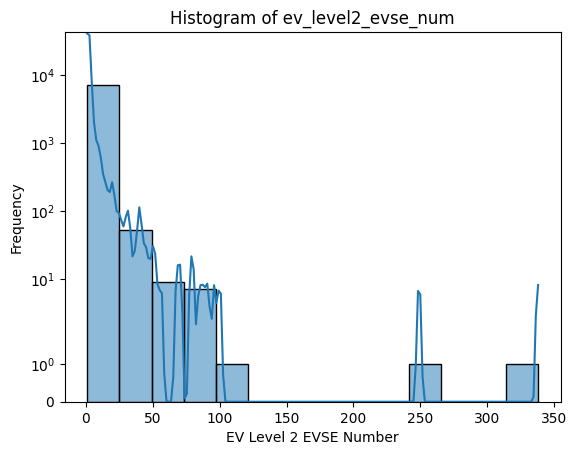

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_1["ev_level2_evse_num"], bins='auto', kde=True)
plt.title("Histogram of ev_level2_evse_num")
plt.xlabel("EV Level 2 EVSE Number")
plt.ylabel("Frequency")
plt.yscale('symlog')

plt.show()

In [40]:
categoricals = df_1.select_dtypes(include='object').columns
categoricals

Index(['city', 'status_code', 'access_code'], dtype='object')

Preprocessing pipeline

In [41]:
# Creating a pipeline
transformer = ColumnTransformer([
    ("cat",Pipeline([
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ohe",OneHotEncoder())
        ]),categoricals),
    ("num",Pipeline([
        ("imputer",SimpleImputer(strategy='constant', fill_value = 0)),
        ("scaler",StandardScaler())
        ]),numericals)
])

In [42]:
pipe = Pipeline([
    ("pre_pro",transformer),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

In [43]:
# Train the model on the data set
pipe.fit(df_1)


Pipeline(steps=[('pre_pro',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['city', 'status_code', 'access_code'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'ev_level2_evse_num'], dtype='object'))])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [44]:
# Get the cluster labels for each data point
df_1['cluster'] = pipe.predict(df_1)

# Display the first few rows of the DataFrame with cluster labels
print(df_1.head(20))

       latitude   longitude           city status_code access_code  \
126   34.040539 -118.271387    Los Angeles           E      public   
127   34.059133 -118.248589    Los Angeles           E     private   
131   34.066801 -118.227605    Los Angeles           E     private   
132   34.036777 -118.368841    Los Angeles           E     private   
133   34.039736 -118.236065    Los Angeles           E     private   
153   33.943250 -118.403342    Los Angeles           E      public   
166   37.806190 -122.415200  San Francisco           E      public   
1074  37.788810 -122.401000  San Francisco           E      public   
1075  37.791791 -122.411265  San Francisco           E      public   
1079  34.229470 -118.544934    Los Angeles           T      public   
1082  34.077588 -118.474585    Los Angeles           E      public   
1093  34.029971 -118.385231    Los Angeles           E      public   
1462  33.944761 -118.399767    Los Angeles           E      public   
1939  34.059047 -118

C:\Users\Damaris\AppData\Local\Temp\ipykernel_16416\4157897395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cluster'] = pipe.predict(df_1)


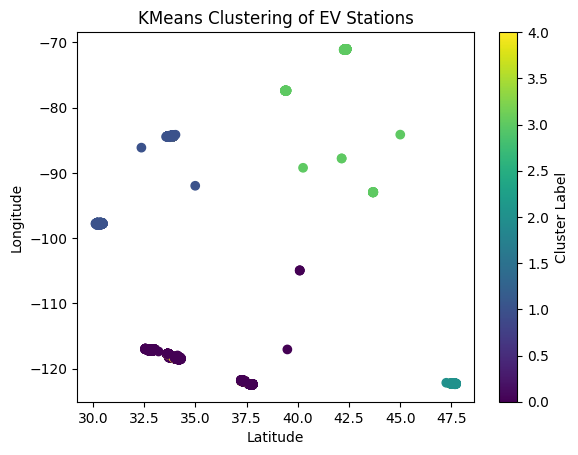

In [45]:
# Plot the clusters (latitude vs. longitude)
plt.scatter(df_1['latitude'], df_1['longitude'], c=df_1['cluster'], cmap='viridis')
plt.title("KMeans Clustering of EV Stations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
def clean_and_split_station_name(station_name):
    """
    Cleans the station name by stripping extra spaces and splitting it into two columns:
    - `station_region`: The part before the hyphen
    - `station_subregion`: The part after the hyphen

    Args:
        station_name (str): The station name.

    Returns:
        tuple: (station_region, station_subregion)
    """
    if not isinstance(station_name, str):  # Handle NaN or non-string values
        return None, None

    station_name = station_name.strip()

    # Check if the station name contains a hyphen
    if ' - ' in station_name:
        return tuple(station_name.split(' - ', 1))  # Split at the first hyphen
    else:
        return station_name, station_name  # If no hyphen, return the name in both columns

# Apply the function to the 'station_name' column and create two new columns
Ev_df2[['station_region', 'station_subregion']] = Ev_df2['station_name'].apply(lambda x: pd.Series(clean_and_split_station_name(x)))

# Show the cleaned and split DataFrame
Ev_df2[['station_name', 'station_region', 'station_subregion']]
    


In [ ]:
 Drop missing values
Ev_df2 = Ev_df2.dropna(subset=["city"])

# Clean the city names
Ev_df2["city"] = Ev_df2["city"].str.lower().str.strip()

# Standardize common city variations
city_corrections = {
    "nyc": "new york",
    "sf": "san francisco",
    "san fran": "san francisco",
    "la": "los angeles",
}
Ev_df2["city"] = Ev_df2["city"].replace(city_corrections)

# Apply frequency encoding
city_counts = Ev_df2["city"].value_counts()
Ev_df2["city_freq_encoded"] = Ev_df2["city"].map(city_counts)

Ev_df2.head()


In [46]:
from sklearn.cluster import KMeans

# Defining the number of clusters
n_clusters = 2 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Training the model
y_kmeans = kmeans.fit_predict(X_tfidf)

## Print the cluster assignments for each document
print(f"Cluster Assignments: {y_kmeans}")

NameError: name 'X_tfidf' is not defined

In [ ]:
# Step 3: Predict the cluster assignments for each document
predictions = kmeans.predict(X_tfidf)

# Print the predictions
print(f"Predicted Cluster Assignments: {predictions}")

### Nairobi OpenStreet Road Netowrk Data

In [ ]:
# Import OpenStreet Map
import osmnx as ox
# Import Geopandas for geospatial Information
import geopandas as gpd

# Define the target location
city = "Nairobi, Kenya"

# Fetch road network
G = ox.graph_from_place(city, network_type="drive")

# Convert to DataFrame
nodes, edges = ox.graph_to_gdfs(G)
#edges.to_csv("nairobi_roads.csv")
print("✅ Nairobi road data saved!")


In [ ]:
### Loading OpenStreet Nairobi Data

data = pd.read_csv('nairobi_roads.csv')

data.head()

This dataset describes Nairobi's road network, with relevant features such as:

* osmid (OpenStreetMap ID)
* highway (road type classification)
* length (road segment length)
* geometry (road segment coordinates)
* lanes (number of lanes)
* junction (whether it's a roundabout or intersection)
* maxspeed (speed limits)

### Tailoring U.S.A data for Kenya

Since the dataset originates from the US, we need to extract only relevant data that can be adapted to the Kenyan context.

1. Filter only EV-related data: Remove non-EV stations (e.g., CNG, LPG) and retain stations where fuel_type_code = EV.
2. Extract relevant columns: Focus on features that can be applied in Kenya, such as:
    * access_code (public/private)
    * ev_pricing_fr (if pricing models are useful)
    * x, y (longitude and latitude)
    * ev_network_ids_posts (charging infrastructure details)
3. Find similar land-use patterns in Kenya (e.g., CBD, highways, malls).
4. Use Nairobi road network data to determine high-traffic areas.
5. Compare US charging station clustering patterns to predict optimal locations in Nairobi.